## Orignal board 

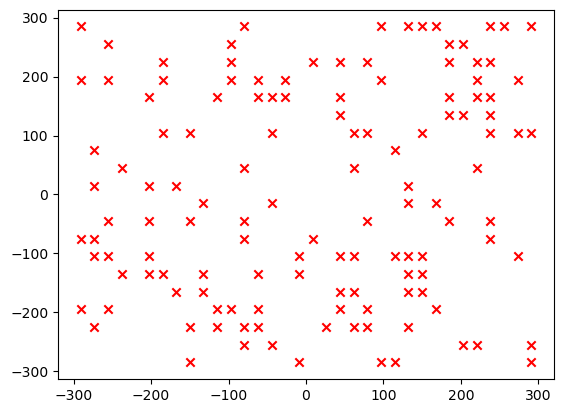

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from PIL import Image
import pandas as pd

def find_probe_positions(checkerboard_path, x_dim, y_dim, square_size):
    im_frame = Image.open(checkerboard_path)
    np_array = np.array(im_frame)

    # Convert to binary image (assuming white squares are brighter than 128)
    binary_image = np_array > 128

    # Extract positions of individual squares
    square_positions = []
    probe_numbers = []
    x_squares = x_dim // square_size
    y_squares = y_dim // square_size

    # Loop over the grid and record the positions of each square
    square_number = 1
    for j in range(y_squares):  # Loop over rows
        for i in range(x_squares):  # Loop over columns
            # Check if the current square is white
            if np.any(binary_image[j * square_size:(j + 1) * square_size, 
                                   i * square_size:(i + 1) * square_size] == True):
                # Calculate the center position (x, y) of the square
                center_x = i * square_size + square_size / 2
                center_y = j * square_size + square_size / 2
                square_positions.append((center_x, center_y))
                probe_numbers.append(square_number)
            square_number += 1  # Increment square number for all squares

    return binary_image, square_positions, probe_numbers

def scale_to_square(checkerboard_img, square_positions, x_dim, y_dim, target_range=(-300, 300)):
    # Define the target range (from -300 to 300)
    target_width = target_range[1] - target_range[0]
    
    # Calculate scaling factors for both axes
    scale_x = target_width / x_dim
    scale_y = target_width / y_dim
    
    # Calculate new positions
    scaled_square_positions = [
        ((x - x_dim / 2) * scale_x, (y - y_dim / 2) * scale_y)
        for x, y in square_positions
    ]

    # Scale the checkerboard image
    new_checkerboard_img = resize(checkerboard_img, 
                                  (int(checkerboard_img.shape[0] * scale_y), 
                                   int(checkerboard_img.shape[1] * scale_x)),
                                  mode='constant', anti_aliasing=False)

    return new_checkerboard_img, scaled_square_positions

# Set parameters
x_dim = 850
y_dim = 500
square_size = 25

# Find probe positions
checkerboard, probe_positions, probe_numbers = find_probe_positions("checkerboard1.png", x_dim, y_dim, square_size)

# Scale the checkerboard and probe positions
scaled_checkerboard, scaled_probe_positions = scale_to_square(checkerboard, probe_positions, x_dim, y_dim)

# Plot the scaled checkerboard with markers for the square positions
#plt.imshow(scaled_checkerboard, cmap='gray')
for pos in scaled_probe_positions:
    plt.scatter(pos[0], pos[1], color='red', marker='x')

plt.show()

# Save the positions into a DataFrame
pos = np.array(scaled_probe_positions)
pos_tran = pos.T
depth_of_probe = 1000
df = pd.DataFrame({"probe_number": probe_numbers, "X": pos_tran[0], "Y": pos_tran[1], 'Z': depth_of_probe})

# Save DataFrame to CSV
df.to_csv("scaled_probe_positions_checkerboard2.csv", index=False)


## These X will be our probe positions, but we need to scale the location of everything to our space Drew does not exactly know how big everything is. He had a guess of the scales being around 10um. This is just a rough scaling for now

## We can apply any scale factor now to the checkerboard, and keep the probe positions up to date as well

## Lets save the probe positions to a CSV to be read in later